In [6]:
# %% [markdown]
# # Step 0: Setup and Imports
# First, let's import the necessary libraries. We'll need `os` for path operations, `zipfile` to handle the downloaded data, `pandas` for data manipulation, and `matplotlib` and `seaborn` for visualization.

# %%
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# %% [markdown]
# # Step 1: Download and Unzip the Dataset
# We will use the Kaggle API to download the dataset. Make sure you have your `kaggle.json` API token configured correctly. This command downloads the dataset and places it in the current directory.
# 
# **Note:** You might need to install the kaggle library first: `pip install kaggle`

# %%
# Make sure your kaggle.json is in ~/.kaggle/ or configured as an environment variable
!kaggle datasets download -d alyyan/emotion-detection -p ../artifacts/data_ingestion --unzip

Dataset URL: https://www.kaggle.com/datasets/alyyan/emotion-detection
License(s): unknown




  0%|          | 0.00/60.9M [00:00<?, ?B/s]
100%|██████████| 60.9M/60.9M [00:00<00:00, 828MB/s]


Found 7 classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    Emotion  Train Count  Test Count
0     angry         3995         958
1   disgust          436         111
2      fear         4097        1024
3     happy         7215        1774
4   neutral         4965        1233
5       sad         4830        1247
6  surprise         3171         831


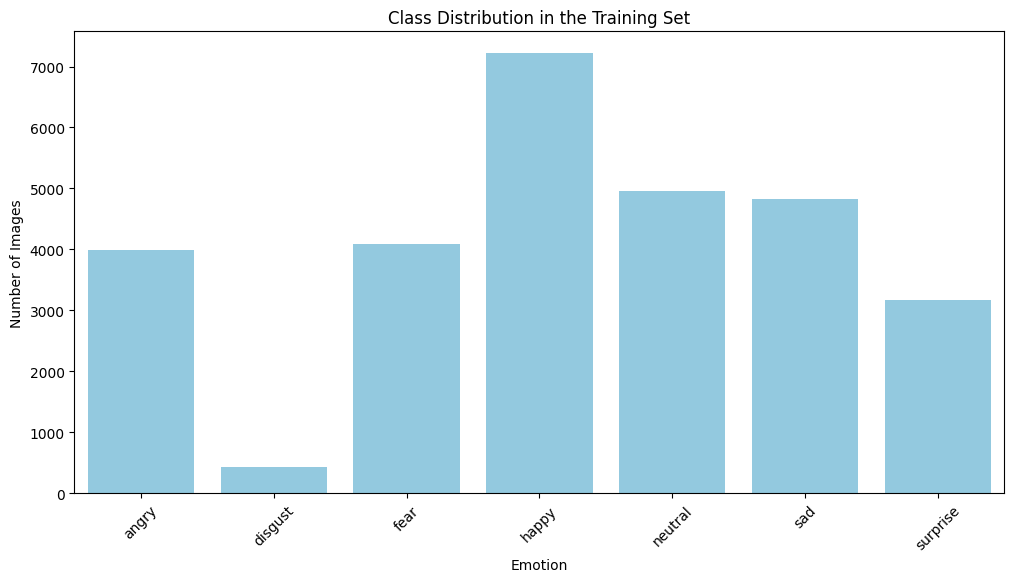

Displaying sample images from the training set:


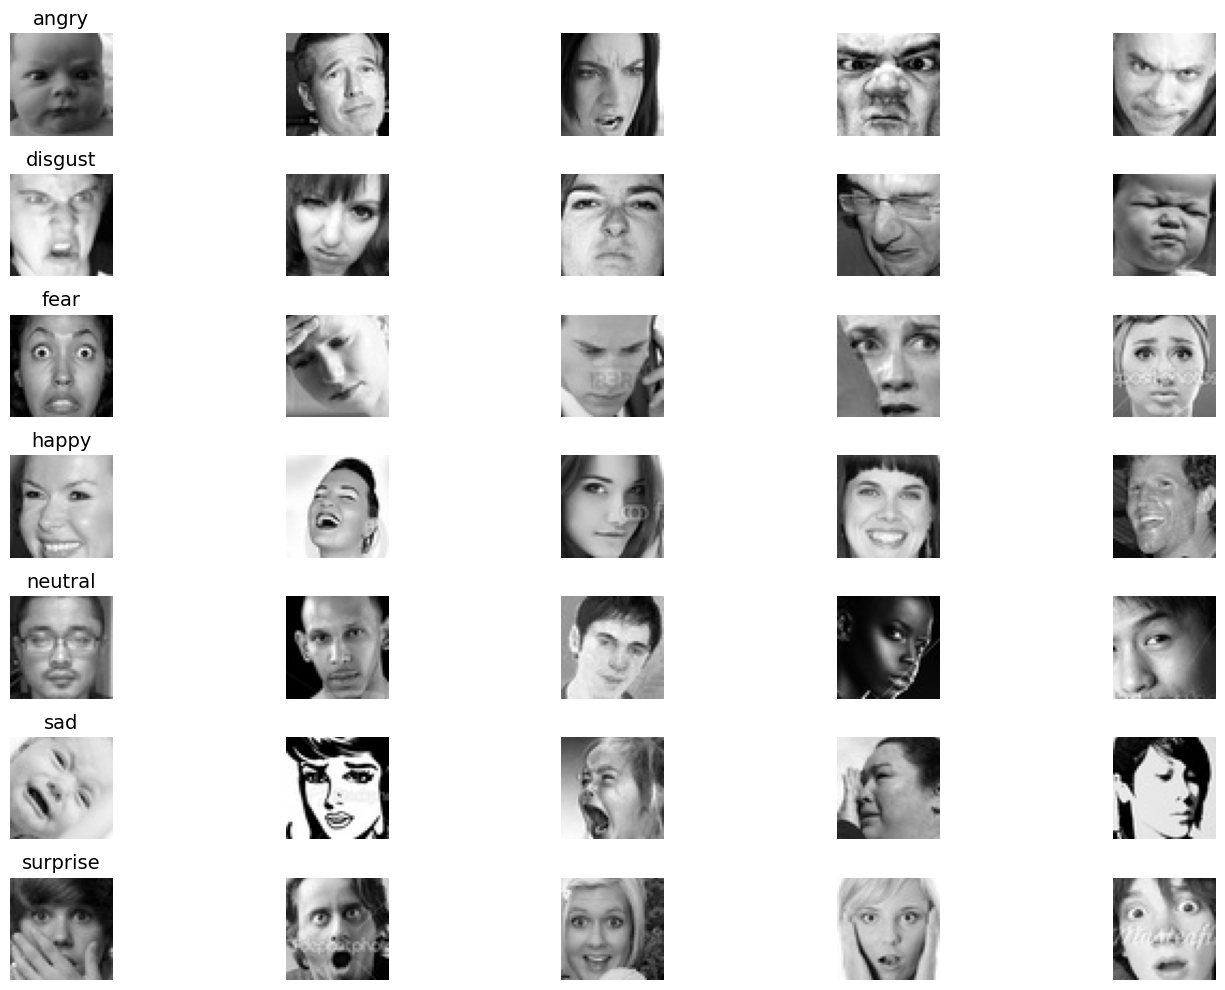

In [7]:


# Define the path to the unzipped data
data_dir = '../artifacts/data_ingestion/archive'

# %% [markdown]
# # Step 2: Explore the Dataset Structure
# Let's see how the data is organized. Typically, image classification datasets are split into `train` and `test` directories, with subdirectories for each class.

# %%
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# List the classes (emotions) by looking at the subdirectories in the training set
classes = os.listdir(train_dir)
print(f"Found {len(classes)} classes: {classes}")

# %% [markdown]
# # Step 3: Count Images in Each Class
# Now, let's count the number of images for each emotion in both the training and testing sets. This is crucial to check for class imbalance.

# %%
def count_images(root_dir):
    """Counts images in each subdirectory of a given directory."""
    counts = {}
    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            counts[class_name] = len(os.listdir(class_path))
    return counts

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Create a DataFrame for easy analysis and plotting
train_df = pd.DataFrame(list(train_counts.items()), columns=['Emotion', 'Train Count'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Emotion', 'Test Count'])

# Merge the dataframes for a combined view
class_distribution = pd.merge(train_df, test_df, on='Emotion')
print(class_distribution)


# %% [markdown]
# # Step 4: Visualize the Class Distribution
# A bar chart is a great way to visualize the counts we just collected. This will clearly show if any classes are over or under-represented.

# %%
plt.figure(figsize=(12, 6))
sns.barplot(data=class_distribution, x='Emotion', y='Train Count', color='skyblue')
plt.title('Class Distribution in the Training Set')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

# %% [markdown]
# ## Initial Observation:
# The bar chart clearly shows a significant class imbalance. The 'happy' class has far more images than any other, while classes like 'fear' and 'disgust' have very few. We will need to address this during training using techniques like **class weighting**.

# %% [markdown]
# # Step 5: Visualize Sample Images
# Let's look at some of the actual images to get a feel for the data quality, lighting conditions, and expressions.

# %%
def display_sample_images(root_dir, classes, num_samples=5):
    """Displays a grid of random sample images from each class."""
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(classes):
        class_path = os.path.join(root_dir, class_name)
        image_files = os.listdir(class_path)
        random_images = random.sample(image_files, num_samples)
        
        for j, image_file in enumerate(random_images):
            img_path = os.path.join(class_path, image_file)
            img = Image.open(img_path)
            
            ax = plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img, cmap='gray')
            plt.axis("off")
            if j == 0:
                plt.title(class_name, size=14)
    plt.tight_layout()
    plt.show()

print("Displaying sample images from the training set:")
display_sample_images(train_dir, classes)